ADF Test p-value: 8.516798938430497e-12


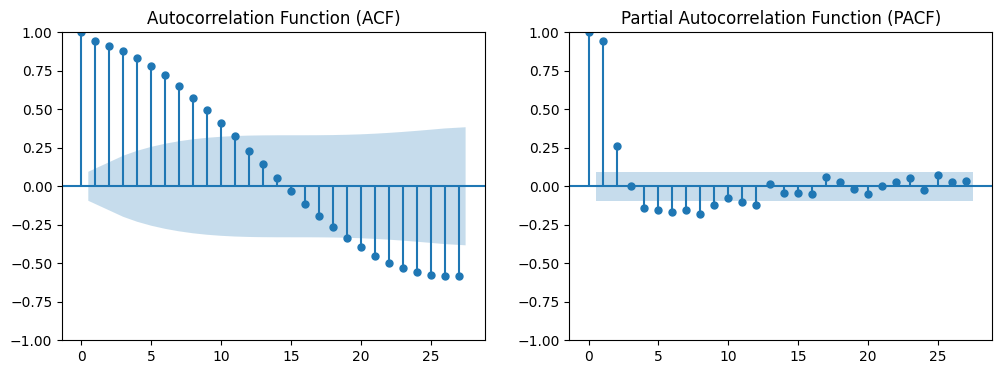

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Total Counts   No. Observations:                  433
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -4799.585
Date:                Wed, 12 Mar 2025   AIC                           9613.170
Time:                        21:16:40   BIC                           9641.665
Sample:                             0   HQIC                          9624.418
                                - 433                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.854e+04   5491.619     16.123      0.000    7.78e+04    9.93e+04
ar.L1          1.9622      0.014    137.894      0.000       1.934       1.990
ar.L2         -0.9753      0.014    -71.356      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


df = pd.read_csv("/content/final_weekly_with_cta_rides_and_weather_not_indexed_to_week.csv")
df["Week"] = pd.to_datetime(df["Week"])
df.set_index("Week", inplace=True)


adf_test = adfuller(df["Total Counts"])
print(f"ADF Test p-value: {adf_test[1]}")
if adf_test[1] > 0.05:
    print("Data is non-stationary, applying differencing...")

df_diff = df["Total Counts"].dropna()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df_diff, ax=axes[0])
plot_pacf(df_diff, ax=axes[1])
axes[0].set_title("Autocorrelation Function (ACF)")
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.show()

model = ARIMA(df["Total Counts"], order=(2, 0, 3))
arima_result = model.fit()


print(arima_result.summary())


forecast = arima_result.forecast(steps=10)
print("\nForecasted Total Counts for Next 10 Weeks:")
print(forecast)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Test RMSE: 47885.36


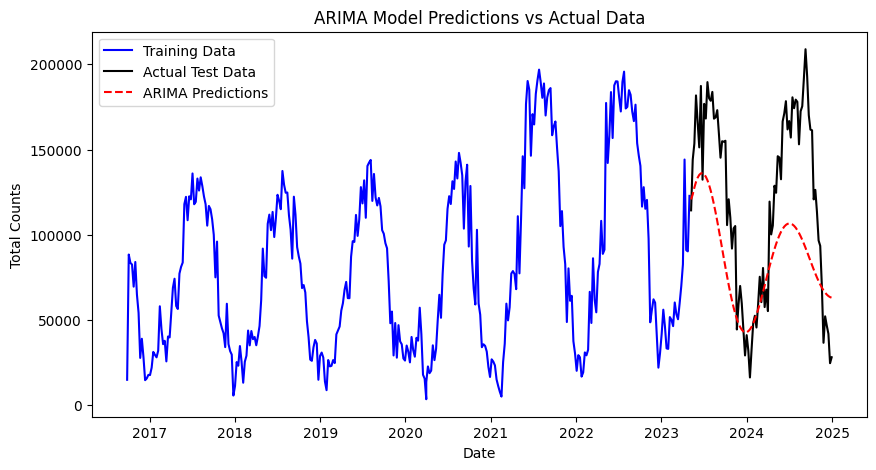

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
346,120733.195982
347,123673.478425
348,127697.822047
349,130962.887006
350,133444.992149
351,135131.894968
352,136022.639876
353,136127.255392
354,135466.308632
355,134070.327230


In [29]:
from sklearn.metrics import mean_squared_error

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

model = ARIMA(train["Total Counts"], order=(2, 0, 3))
arima_result = model.fit()

test_predictions = arima_result.forecast(steps=len(test))

rmse = np.sqrt(mean_squared_error(test["Total Counts"], test_predictions))
print(f"Test RMSE: {rmse:.2f}")

plt.figure(figsize=(10, 5))
plt.plot(train.index, train["Total Counts"], label="Training Data", color="blue")
plt.plot(test.index, test["Total Counts"], label="Actual Test Data", color="black")
plt.plot(test.index, test_predictions, label="ARIMA Predictions", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Total Counts")
plt.title("ARIMA Model Predictions vs Actual Data")
plt.legend()
plt.show()

future_forecast = arima_result.forecast(steps=24)
future_forecast